# Notes for Graphs

- Graphs are composed of `vertices` or `nodes`, connected by an `edge` or `connection`
    - there is no limit to how many vertices a node can be connected to
    - not all vertices are connected by edges; there are no rules 
    
- Edges can also be weighted or non-weighted
    - e.g. Maps or data routing;
    - Without weights, you may wish to take fewer hopws
    - With weights, you may prefer the shorter route e.g. lower cumulative weight
    
- Edges can be directional or non-directional

- Graphs are a meta-precursor of several other data structures;
    - Trees are graphs where each node has 2 directional non-weighted edges to each other node
    - LLs are graphs where each node has 1 directional non-weighted edge to another node
    - DLL are graphs where each node can be connected to up to 2 other nodes with 2 directional edges between each node

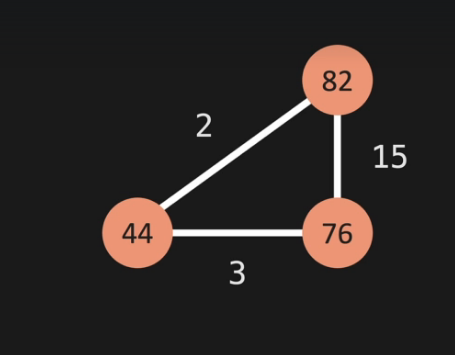

## 6.1 Understanding Adjacency via Lists & Matrices 

### Adjacency Matrix 

- Consider a graph with 5 nodes, in the shape of a pentagon (e.g. each node is connected to 2 nodes); assume the nodes are labelled [A, B, C, D, E]
- The adjacency matrix may look like:
    - the first column, "\" represents each actual vertex
    - the first row represents vertices it shares an edge with; 1 if adjacent, 0 if not
    - vertices can't edge to themselves, so there will always be a 45-degree line of zeroes (self-edging)
    - Nondirectional matrices will also be mirrored around the 45-deg line
    
```
 \   A   B   C   D   E 
 A   0   1   0   0   1
 B   1   0   1   0   0
 C   0   1   0   1   0
 D   0   0   1   0   1
 E   1   0   0   1   0
 ```
 
 - If edges are weighted, we will store the weights in the matrix instead of 1.
 - e.g:
 
 
```
 \   A   B   C   D   E 
 A   0   2   0   0  10
 B   2   0   4   0   0
 C   0   4   0   6   0
 D   0   0   6   0   8
 E  10   0   0   8   0
 ```
 
### Adjacency List
- Captures the same information, except within a dictionary
    - each key = vertex, value = list of 
- Consider the same pentagon of ABCDE;

```
adjacency_list = {

    'A': [ 'B', 'E' ]
    'B': [ 'A', 'C' ]
    'C': [ 'B', 'D' ]
    'D': [ 'C', 'E' ]
    'E': [ 'D', 'A' ]
    
    }
```

- But what about directional edges?
    - The dictionary will only store directional edges
    - For example, if the edges only point out from A, C and D:

```
adjacency_list = {
    'A': [ 'B', 'E' ]
    'B': []
    'C': [ 'B', 'D' ]
    'D': [ 'C', 'E' ]
    'E': []
}
```
    
- But what about weighted edges?
    - vertices are stored in pairs of destination node first, and weight second, e.g. 

```
adjacency_list = {
    'A': [ ('B', 2) , ('E', 10)]
    'B': []
    'C': [ ('B', 4) , ('D', 6) ]
    'D': [ ('C', 6) , ('E', 8) ]
    'E': []
}
```



### Space Complexity of Adj Matrix & Adj List
- When comparing list and matrix, 
    - Each vertex in a list only stores the destination vertex
    - Each vertex in a matrix must store all possible combinations/edges with a vertex (e.g. 1 or 0)
- So, from a space complexity standpoint
    - Adj Matrix = O ( |V| ^ 2 ) where |V| represents number of vertices
    - Adj List = O ( |V| + |E| ) where |V|, |E| represents number of vertices & number of edges
    
### Time Complexity of Operations

1. Adding a vertex (without adding any edges):
    - Adj List: O(1), just adding an entry to the dictionary/appending to list
    - Adj Matrix: O(|V| ^ 2), needs to add new row + new column of length n
    
2. Adding an edge
    - Both O(1); 
        - Adj List : appending to KVP in dictionary
        - Adj Matrix: appending values in table

3. Removing an edge
    - Adj Matrix: O(1) changing values in table
    - Adj List: O( |E| ) iterating through list of edges in dictionary
    
4. Removing an vertex
    - Adj Matrix: reverse operation of adding a vertex, O(|V| ^ 2)
    - Adj List: Not just removing the key of the vertex, but also iterating through each edge to remove any instance of the vertex; this therefore requires   O ( |V| + |E| )
    

### 6.0 Graph Constructor & adding `Vertext` and `Edge`
- Vertex treated kind of like keys in dictionary 
- These assume nondirectional unweighted edges for now

In [13]:
# Creating Graph Class
class Graph:                           # initializing the graph class
    def __init__(self):                # default constructor stuff
        self.adj_list = {}             # initially empty raph        

    def print_graph(self):
        for vertex in self.adj_list:
            print(vertex, ": ", self.adj_list[vertex])

    def add_vertex(self, vertex):
        if vertex not in self.adj_list.keys():    # check for duplicates
            self.adj_list[vertex] = [] # creates adj list for vertex
            return True                # return True if vertex added
        return False                   # return False if method failed

    
    def add_edge(self, v1, v2):        # add edge between v1 and v2...
        if v1 in self.adj_list.keys() and v2 in self.adj_list.keys(): # check v1v2 exist
            self.adj_list[v1].append(v2)   # puts v2 in adj_list of v1
            self.adj_list[v2].append(v1)   # puts v1 in adj_list of v2
            return True                # return True if vertex added
        return False         

In [14]:
# test add_vertex
my_graph = Graph()

my_graph.add_vertex("A")

my_graph.add_vertex("B")


my_graph.print_graph()

A :  []
B :  []


In [15]:
# test add_edge


print(my_graph.add_edge("A", "B"))

print(my_graph.add_edge("A", "C"))


my_graph.print_graph()

True
False
A :  ['B']
B :  ['A']


### 6.1 Graph `remove_edge` and `remove_vertex` methods
- `remove_edge` is almost inverse of `add_edge`
- `remove_vertex` probably has huge O(|V| + |E|)

In [29]:
# adding remove_edge method; 
# seems to be inverse of add_edge method

class Graph:                           # initializing the graph class
    def __init__(self):                # default constructor stuff
        self.adj_list = {}             # initially empty raph        

    def print_graph(self):
        for vertex in self.adj_list:
            print(vertex, ": ", self.adj_list[vertex])

    def add_vertex(self, vertex):
        if vertex not in self.adj_list.keys():    # check for duplicates
            self.adj_list[vertex] = [] # creates adj list for vertex
            return True                # return True if vertex added
        return False                   # return False if method failed

    
    def add_edge(self, v1, v2):        # add edge between v1 and v2...
        if v1 in self.adj_list.keys() and v2 in self.adj_list.keys(): # check v1v2 exist
            self.adj_list[v1].append(v2)   # puts v2 in adj_list of v1
            self.adj_list[v2].append(v1)   # puts v1 in adj_list of v2
            return True                # return True if vertex added
        return False         
    
    def remove_edge(self, v1, v2): 
        if v1 in self.adj_list.keys() and v2 in self.adj_list.keys(): # check v1v2 exist
            try:                               # try these methods, but...
                self.adj_list[v1].remove(v2)   # remove v2 instead of append
                self.adj_list[v2].remove(v1)   # remove v1 instead of append
            except ValueError:                 # if ValueError is thrown, then...
                pass                           # ...ignore the error, and pass 
            return True                    # return True if vertex added
        return False         


In [32]:
# creating a graph to demonstrate remove_edge
# initial graph illustration:
#     A 
#    / \
#   /   \
#  /     \
# B _ _ _ C 

my_graph = Graph()

my_graph.add_vertex("A")

my_graph.add_vertex("B")

my_graph.add_vertex("C")


my_graph.add_edge("A", "B")
my_graph.add_edge("A", "C")
my_graph.add_edge("C", "B")


my_graph.print_graph()

A :  ['B', 'C']
B :  ['A', 'C']
C :  ['A', 'B']


In [33]:
# now we want to remove the A-B link: 
# initial graph illustration:
#     A 
#      \
#       \
#        \
# B _ _ _ C 


my_graph.remove_edge("A", "B")

my_graph.print_graph()

A :  ['C']
B :  ['C']
C :  ['A', 'B']


In [34]:
# what about edge case, of an unlinked vertex?

my_graph.add_vertex("D")

print(my_graph.remove_edge("A", "D"))

True


In [57]:
# adding remove_vertex method; 
# bi-directional graphs have a huge efficiency; if A is linked to B, B is linked to A
# -> so to remove all edges with D, we can simply iterate through the vertices D links to:
# -> i.e. iterate through D :  ['A', 'C', 'B'] and do remove_edge
# then, we can finally remove the vertext D 

class Graph:                           # initializing the graph class
    def __init__(self):                # default constructor stuff
        self.adj_list = {}             # initially empty raph        

    def print_graph(self):
        for vertex in self.adj_list:
            print(vertex, ": ", self.adj_list[vertex])

    def add_vertex(self, vertex):
        if vertex not in self.adj_list.keys():    # check for duplicates
            self.adj_list[vertex] = [] # creates adj list for vertex
            return True                # return True if vertex added
        return False                   # return False if method failed

    
    def add_edge(self, v1, v2):        # add edge between v1 and v2...
        if v1 in self.adj_list.keys() and v2 in self.adj_list.keys(): # check v1v2 exist
            self.adj_list[v1].append(v2)   # puts v2 in adj_list of v1
            self.adj_list[v2].append(v1)   # puts v1 in adj_list of v2
            return True                # return True if vertex added
        return False         
    
    def remove_edge(self, v1, v2): 
        if v1 in self.adj_list.keys() and v2 in self.adj_list.keys(): # check v1v2 exist
            try:                               # try these methods, but...
                self.adj_list[v1].remove(v2)   # remove v2 instead of append
                self.adj_list[v2].remove(v1)   # remove v1 instead of append
            except ValueError:                 # if ValueError is thrown, then...
                pass                           # ...ignore the error, and pass 
            return True                    # return True if vertex added
        return False         

    def remove_vertex(self, vertex):
        if vertex in self.adj_list.keys():  
            for endpoint_vertex in self.adj_list[vertex]: 
                self.adj_list[endpoint_vertex].remove(vertex)
            del self.adj_list[vertex]
            return True
        return False

In [58]:
# creating a graph to demonstrate remove_vertex (D)
# initial graph illustration:
#     A _ _ _ B 
#    / \     /
#   /   \   /
#  /     \ / 
# C _ _ _ D 

my_graph = Graph()

my_graph.add_vertex("A")
my_graph.add_vertex("B")
my_graph.add_vertex("C")
my_graph.add_vertex("D")

my_graph.add_edge("A", "B")
my_graph.add_edge("A", "C")
my_graph.add_edge("A", "D")
my_graph.add_edge("C", "D")
my_graph.add_edge("B", "D")

my_graph.print_graph()
print("--- --- ---")

my_graph.remove_vertex("D")

my_graph.print_graph()
print("--- --- ---")


A :  ['B', 'C', 'D']
B :  ['A', 'D']
C :  ['A', 'D']
D :  ['A', 'C', 'B']
--- --- ---
A :  ['B', 'C']
B :  ['A']
C :  ['A']
--- --- ---


### 4.1 HashTable `set_item` and `get_item`
- set_item takes a key-value pair and
    - hashes the key to find the address
    - stores the key-value pair at the address
- get_item takes a key-value pair and
    - hashes the key to find the address
    - if it exists, retrieves the key_value pair here
    - else, returns None


In [24]:
# Creating HashTable set_item
class HashTable:                       # initializing the node class
    def __init__(self, size = 7):      # sets default size=7
        self.data_map = [None] * size  # creates a data_map of 7 [Nones]
        
    def hash(self, key):
        my_hash = 0
        for letter in key:         
            my_hash = (my_hash         # difficult to backcalculate 
                      + ord(letter)    # takes ASCII value of each leter
                      * 23             # 23 is prime number
                      ) % len(self.data_map)
        # here, len(self.data_map) == 7
        # so modulo 7 will always return a number from 0 to 6
        # which gives us a clever way to find a hash address
        return my_hash
    
    def print_table(self):
        for i, val in enumerate(self.data_map):
            print(i, " : ", val)
    
    def set_item(self, key, value):
        index = self.hash(key)       # hashing to create the address
        if self.data_map[index] == None:
            self.data_map[index] = []      # creating empty list at address
        self.data_map[index].append([key, value])

In [25]:
my_hash_table = HashTable()

my_hash_table.set_item('bolts', 1400)
my_hash_table.set_item('washers', 50)
my_hash_table.set_item('lumber', 70)


my_hash_table.print_table()

0  :  None
1  :  None
2  :  None
3  :  None
4  :  [['bolts', 1400], ['washers', 50]]
5  :  None
6  :  [['lumber', 70]]


In [34]:
# Creating HashTable get_item
class HashTable:                       # initializing the node class
    def __init__(self, size = 7):      # sets default size=7
        self.data_map = [None] * size  # creates a data_map of 7 [Nones]
        
    def hash(self, key):
        my_hash = 0
        for letter in key:         
            my_hash = (my_hash         # difficult to backcalculate 
                      + ord(letter)    # takes ASCII value of each leter
                      * 23             # 23 is prime number
                      ) % len(self.data_map)
        # here, len(self.data_map) == 7
        # so modulo 7 will always return a number from 0 to 6
        # which gives us a clever way to find a hash address
        return my_hash
    
    def print_table(self):
        for i, val in enumerate(self.data_map):
            print(i, " : ", val)
    
    def set_item(self, key, value):
        index = self.hash(key)       # hashing to create the address
        if self.data_map[index] == None:
            self.data_map[index] = []      # creating empty list at address
        self.data_map[index].append([key, value])
        
    def get_item(self, key):
        index = self.hash(key)       # hashing to create the address
        if self.data_map[index] is not None:
            for list in self.data_map[index]:
                if list[0] == key:
                    return list [1]  # returns the value of pair
        return None

In [36]:
my_hash_table = HashTable()

my_hash_table.set_item('bolts', 1400)
my_hash_table.set_item('washers', 50)
my_hash_table.set_item('lumber', 70)


my_hash_table.print_table()

0  :  None
1  :  None
2  :  None
3  :  None
4  :  [['bolts', 1400], ['washers', 50]]
5  :  None
6  :  [['lumber', 70]]


In [37]:
print(my_hash_table.get_item('lumber'))
print(my_hash_table.get_item('bolts'))
print(my_hash_table.get_item('volts'))

70
1400
None


### 4.2 HashTable `keys`
- `keys` method goes through the HT, and extracts all the keys from each index

In [29]:
# Creating HashTable get_item
class HashTable:                       # initializing the node class
    def __init__(self, size = 7):      # sets default size=7
        self.data_map = [None] * size  # creates a data_map of 7 [Nones]
        
    def hash(self, key):
        my_hash = 0
        for letter in key:         
            my_hash = (my_hash         # difficult to backcalculate 
                      + ord(letter)    # takes ASCII value of each leter
                      * 23             # 23 is prime number
                      ) % len(self.data_map)
        # here, len(self.data_map) == 7
        # so modulo 7 will always return a number from 0 to 6
        # which gives us a clever way to find a hash address
        return my_hash
    
    def print_table(self):
        for i, val in enumerate(self.data_map):
            print(i, " : ", val)
    
    def set_item(self, key, value):
        index = self.hash(key)       # hashing to create the address
        if self.data_map[index] == None:
            self.data_map[index] = []      # creating empty list at address
        self.data_map[index].append([key, value])
        
    def get_item(self, key):
        index = self.hash(key)       # hashing to create the address
        if self.data_map[index] is not None:
            for list in self.data_map[index]:
                if list[0] == key:
                    return list [1]  # returns the value of pair
        return None
    
    def keys(self):
        all_keys = []
        for container in self.data_map:
            if container is not None:
                for key_value_pair in container:
                    all_keys.append(key_value_pair[0])
        return all_keys

In [30]:
my_hash_table = HashTable()

my_hash_table.set_item('bolts', 1400)
my_hash_table.set_item('washers', 50)
my_hash_table.set_item('lumber', 70)


my_hash_table.print_table()

0  :  None
1  :  None
2  :  None
3  :  None
4  :  [['bolts', 1400], ['washers', 50]]
5  :  None
6  :  [['lumber', 70]]


In [31]:
my_hash_table.keys()

['bolts', 'washers', 'lumber']

### 4.3 HashTable Sample Interview question

There are two lists:
    - List_A = [1, 3, 5]
    - List_B = [2, 4, 5]
    
How do we determine which items are in common?

#### Naive approach
- Nested for loops;
    - For every item in List A...
    - Compare to every item in List B...
- Completing in O(n^2)

#### Hash Table Approach
- Key knowledge: the same key will result in the same hash number 
- Steps:
    1. Put List A into a dictionary; the value of each key as "True"
    2. For each item in List B, search through the dictionary. If no match, return false
- Since this loops through each list only once each time, this runs in O(2n), simplifying to O(n)
- HashTable/Dictionary approach is way more efficient

In [42]:
def item_in_common(list1, list2):
    dict_list1 = {}
    for item in list1:
        dict_list1[item] = True
    for item in list2:
        if item in dict_list1:
            return True
    return False

In [44]:
list1 = ["mary", "elizabeth", "winstead"]
list2 = ["matthew", "mccough", "mary"]
item_in_common(list1, list2)

True

### 4.4 HashTable Adding Vertex and Edges 



In [29]:
# Creating HashTable get_item
class HashTable:                       # initializing the node class
    def __init__(self, size = 7):      # sets default size=7
        self.data_map = [None] * size  # creates a data_map of 7 [Nones]
        
    def hash(self, key):
        my_hash = 0
        for letter in key:         
            my_hash = (my_hash         # difficult to backcalculate 
                      + ord(letter)    # takes ASCII value of each leter
                      * 23             # 23 is prime number
                      ) % len(self.data_map)
        # here, len(self.data_map) == 7
        # so modulo 7 will always return a number from 0 to 6
        # which gives us a clever way to find a hash address
        return my_hash
    
    def print_table(self):
        for i, val in enumerate(self.data_map):
            print(i, " : ", val)
    
    def set_item(self, key, value):
        index = self.hash(key)       # hashing to create the address
        if self.data_map[index] == None:
            self.data_map[index] = []      # creating empty list at address
        self.data_map[index].append([key, value])
        
    def get_item(self, key):
        index = self.hash(key)       # hashing to create the address
        if self.data_map[index] is not None:
            for list in self.data_map[index]:
                if list[0] == key:
                    return list [1]  # returns the value of pair
        return None
    
    def keys(self):
        all_keys = []
        for container in self.data_map:
            if container is not None:
                for key_value_pair in container:
                    all_keys.append(key_value_pair[0])
        return all_keys

In [30]:
my_hash_table = HashTable()

my_hash_table.set_item('bolts', 1400)
my_hash_table.set_item('washers', 50)
my_hash_table.set_item('lumber', 70)


my_hash_table.print_table()

0  :  None
1  :  None
2  :  None
3  :  None
4  :  [['bolts', 1400], ['washers', 50]]
5  :  None
6  :  [['lumber', 70]]


In [31]:
my_hash_table.keys()

['bolts', 'washers', 'lumber']